# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>EMAIL ID:</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__7

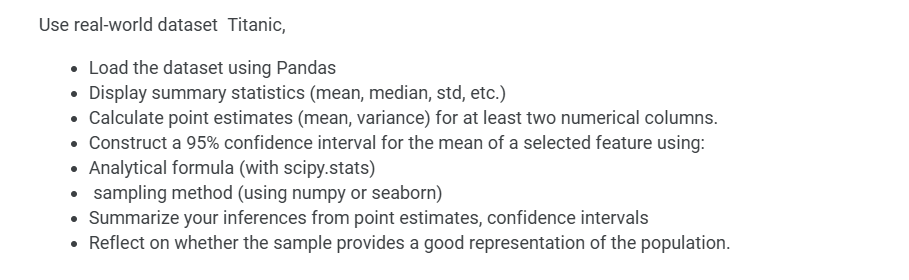

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading the Data with Pandas

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


## 2. Displaying Summary Statistics

In [4]:
print(df.describe())

       Unnamed: 0    survived      pclass         age       sibsp       parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean   445.000000    0.383838    2.308642   29.699118    0.523008    0.381594   
std    257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   
min      0.000000    0.000000    1.000000    0.420000    0.000000    0.000000   
25%    222.500000    0.000000    2.000000   20.125000    0.000000    0.000000   
50%    445.000000    0.000000    3.000000   28.000000    0.000000    0.000000   
75%    667.500000    1.000000    3.000000   38.000000    1.000000    0.000000   
max    890.000000    1.000000    3.000000   80.000000    8.000000    6.000000   

             fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


In [5]:
print("Medians:")
columns = ['age', 'fare']
print(df[columns].median())

Medians:
age     28.0000
fare    14.4542
dtype: float64


## 3. Calculating Point Estimates

In [6]:
mean_age = df['age'].mean()
variance_age = df['age'].var()
print("Mean Age:", mean_age)
print("Variance of Age:", variance_age)

Mean Age: 29.69911764705882
Variance of Age: 211.0191247463081


In [7]:
mean_fare = df['fare'].mean()
variance_fare = df['fare'].var()
print("Mean Fare:", mean_fare)
print("Variance of Fare:", variance_fare)

Mean Fare: 32.204207968574636
Variance of Fare: 2469.436845743117


## 4. Constructing a 95% Confidence Interval for a Selected Feature

### A. Analytical Confidence Interval (using scipy.stats):

In [8]:
ages = df['age'].dropna()
n = len(ages)
mean_age = ages.mean()
std_age = ages.std(ddof=1)  # sample standard deviation
standard_error = std_age / np.sqrt(n)

In [9]:
ci_analytical = stats.t.interval(0.95, df=n-1, loc=mean_age, scale=standard_error)
print("95% CI for Age (analytical):", ci_analytical)

95% CI for Age (analytical): (28.631790041821507, 30.766445252296133)


### B. Sampling (Bootstrapping) Method:

In [10]:
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    sample = ages.sample(n, replace=True)
    bootstrap_means.append(sample.mean())

# Determine the 2.5th and 97.5th percentiles
ci_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% CI for Age (bootstrap):", ci_bootstrap)

95% CI for Age (bootstrap): [28.56099545 30.71276401]


## 5. Summarizing Your Inferences

### <u>A. Point Estimates: -</u> 
### The means of Age and Fare describe the central tendency of these features. For example, if the mean age is 29 years, it suggests that the typical passenger was around that age. The variances highlight the spread within the data.

### <u>B. Confidence Intervals: - </u>
### The analytical and bootstrap approaches should yield similar intervals if the sample size is adequate and the underlying assumptions hold. For instance, if both methods yield a 95% CI for Age roughly between 28 and 30 years, you’re 95% confident that the true mean age of the population of Titanic passengers lies in that range. A narrower interval indicates more precise estimates.

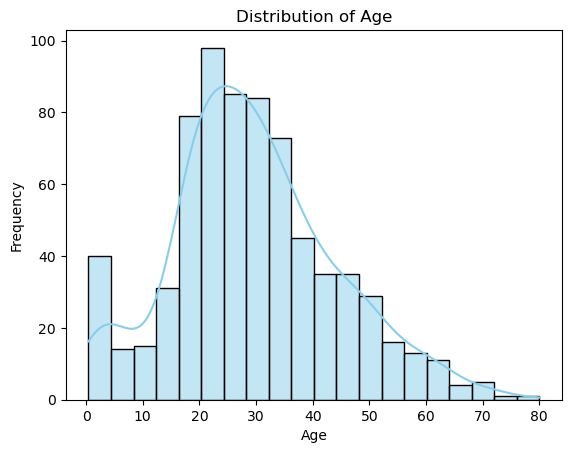

In [12]:
sns.histplot(df['age'].dropna(), kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


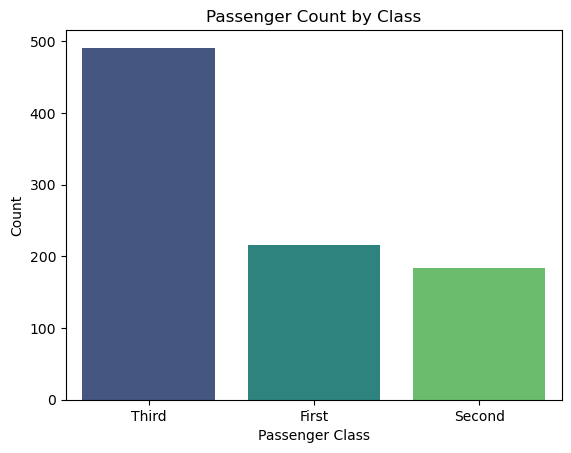

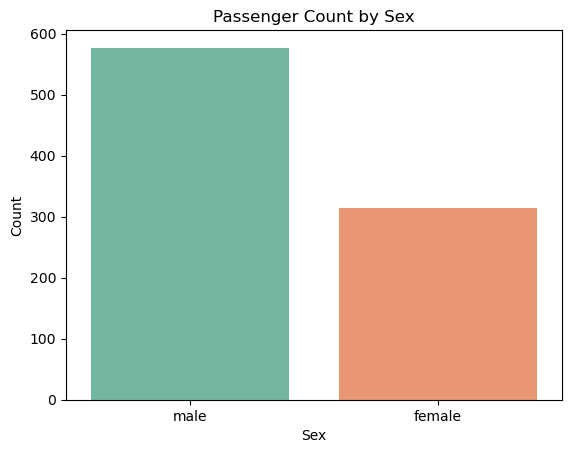

In [15]:
sns.countplot(x="class", data=df, palette="viridis", hue='class')
plt.title("Passenger Count by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

sns.countplot(x="sex", data=df, palette="Set2", hue = 'sex')
plt.title("Passenger Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


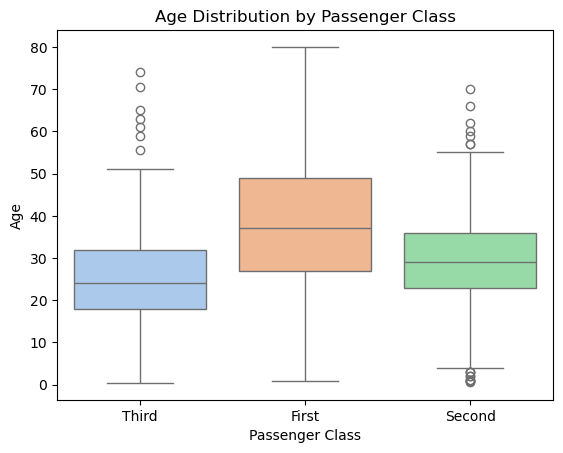

In [16]:
sns.boxplot(x="class", y="age", data=df, palette="pastel", hue = 'class')
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


## 6. Reflect on whether the sample provides a good representation of the population.

### --> Missing Data: Many records have missing values—particularly in critical features like age or deck. This missing information may not be random; for instance, data for lower-class passengers or younger children might be underreported, thereby affecting measures of central tendency and variability.

### --> Historical and Selection Bias: The dataset is derived from historical records, and the process of documenting passengers in 1912 was not uniform. Higher-class passengers or survivors might have been documented more accurately than lower-class passengers or those who perished. This can lead to survivorship bias, where the data overrepresents those with better-documented lives.

### --> Underrepresentation of Certain Groups: Although the dataset includes records across different classes, there is the possibility that some subgroups (such as crew members or very young children) are not as well represented. This skew could influence the generalizability of any findings to the entire onboard population.

### Overall, the Titanic dataset does capture essential aspects of the passenger complement, offering insights into class, age, sex, and survival. However, because of the missing data and historical biases in data collection—issues that are inherent in many real-world historical datasets—the sample should be viewed as moderately representative rather than a fully unbiased snapshot of the Titanic’s entire population.